In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Mnist Image classification

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, y_train), (test_images, y_test) = mnist.load_data()
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255


In [5]:
x_train.shape

(60000, 28, 28, 1)

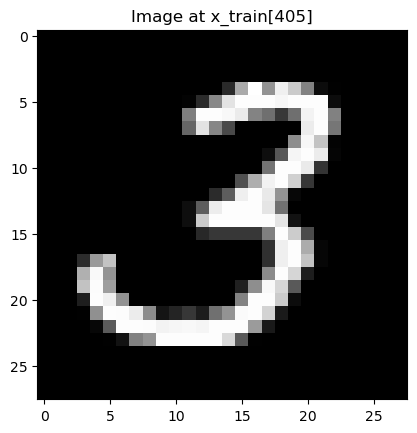

In [11]:
import matplotlib.pyplot as plt

image = x_train[405]

# Plotting the image
plt.imshow(image, cmap='gray')
plt.title('Image at x_train[405]')
plt.show()


In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary(line_length=80)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_2 (Conv2D)                  (None, 26, 26, 32)              320         
                                                                                
 max_pooling2d_2 (MaxPooling2D)     (None, 13, 13, 32)              0           
                                                                                
 conv2d_3 (Conv2D)                  (None, 11, 11, 64)              18496       
                                                                                
 max_pooling2d_3 (MaxPooling2D)     (None, 5, 5, 64)                0           
                                                                                
 flatten_1 (Flatten)                (None, 1600)                    0           
                                                                                
 dense

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

acc = hist.history['accuracy']

val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Epoch 1/10
1200/1200 [==============================] - 25s 20ms/step - loss: 0.1484 - accuracy: 0.9551 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 2/10
1200/1200 [==============================] - 27s 22ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0333 - val_accuracy: 0.9873
Epoch 3/10
1200/1200 [==============================] - 27s 22ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 4/10
1200/1200 [==============================] - 26s 22ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0281 - val_accuracy: 0.9903
Epoch 5/10
1200/1200 [==============================] - 28s 23ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0340 - val_accuracy: 0.9886
Epoch 6/10
1200/1200 [==============================] - 32s 26ms/step - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0297 - val_accuracy: 0.9915
Epoch 7/10
 788/1200 [==================>...........] - ETA: 9s - loss: 0.0101 - accuracy: 0.9965